In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../data/Paris/listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        30990 non-null  int64  
 1   호스트_id       30990 non-null  int64  
 2   슈퍼호스트        30990 non-null  object 
 3   숙소_수         30990 non-null  float64
 4   숙소_지역        30990 non-null  object 
 5   숙소_유형        30990 non-null  object 
 6   수용_인원수       30990 non-null  int64  
 7   욕실수          30990 non-null  float64
 8   침실수          30990 non-null  float64
 9   침대수          30990 non-null  float64
 10  편의시설         30990 non-null  object 
 11  숙소_가격        30990 non-null  float64
 12  최소_숙박일       30990 non-null  int64  
 13  최대_숙박일       30990 non-null  int64  
 14  리뷰수          30990 non-null  int64  
 15  30일_리뷰수      30990 non-null  int64  
 16  리뷰점수         30990 non-null  float64
 17  숙소_정확성_리뷰점수  30990 non-null  float64
 18  숙소_청결도_리뷰점수  30990 non-null  float64
 19  숙소_체크인_리뷰

In [50]:
df.columns

Index(['숙소_id', '호스트_id', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '편의시설', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', 'url', '숙소_특징', '12개월_리뷰수',
       '예약가능여부', '마지막_리뷰'],
      dtype='object')

PCA 전 상관계수 확인

In [51]:
# 상관계수에 불필요한 컬럼들 제거
df_clean = df.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설','예약가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])


In [52]:
df_clean.head(3)

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
1,1.0,2,1.0,0.0,1.0,140.0,3,365,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69,14
2,3.0,2,1.0,0.0,1.0,107.0,1,1125,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19,61
3,3.0,4,1.0,1.0,1.0,200.0,2,120,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51,1


In [53]:
df_clean.corr()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
숙소_수,1.000000,0.072397,0.050807,0.021303,0.049705,0.011811,0.045499,0.160765,-0.034157,0.004186,-0.173307,-0.156177,-0.112109,-0.178036,-0.205230,-0.047641,-0.180827,-0.013471,-0.027291
수용_인원수,0.072397,1.000000,0.513838,0.672141,0.785599,0.199352,-0.062471,0.092453,0.027002,0.027205,-0.034344,-0.052515,-0.012051,-0.054547,-0.065996,-0.002695,-0.029298,0.042294,0.043512
욕실수,0.050807,0.513838,1.000000,0.606889,0.591580,0.173193,-0.028125,0.046594,0.007708,0.001909,0.043394,0.017499,0.061316,0.005065,0.000568,0.047160,0.042952,0.000156,0.004324
침실수,0.021303,0.672141,0.606889,1.000000,0.684795,0.174294,-0.057804,0.017404,-0.013044,-0.046988,0.068411,0.040126,0.056208,0.022338,0.021765,0.036801,0.071324,-0.048063,-0.027215
침대수,0.049705,0.785599,0.591580,0.684795,1.000000,0.167432,-0.033170,0.075789,0.047605,-0.002578,-0.016561,-0.035059,0.000239,-0.028985,-0.044119,0.012420,-0.007547,-0.001328,0.030924
숙소_가격,0.011811,0.199352,0.173193,0.174294,0.167432,1.000000,-0.007831,0.021544,-0.017450,-0.041527,0.026149,0.015281,0.040438,-0.004023,-0.014240,0.050457,0.023783,-0.038569,-0.027269
최소_숙박일,0.045499,-0.062471,-0.028125,-0.057804,-0.033170,-0.007831,1.000000,0.040583,-0.038752,-0.080922,-0.020439,-0.014411,-0.032201,-0.011889,-0.038871,0.015540,-0.036298,-0.128229,-0.106775
최대_숙박일,0.160765,0.092453,0.046594,0.017404,0.075789,0.021544,0.040583,1.000000,0.111279,0.026920,-0.106666,-0.087671,-0.069213,-0.096181,-0.114485,-0.025553,-0.102741,0.018674,0.056114
리뷰수,-0.034157,0.027002,0.007708,-0.013044,0.047605,-0.017450,-0.038752,0.111279,1.000000,0.343425,-0.012064,0.028203,0.044912,0.045389,0.026239,0.036649,0.038100,0.455391,0.674146
30일_리뷰수,0.004186,0.027205,0.001909,-0.046988,-0.002578,-0.041527,-0.080922,0.026920,0.343425,1.000000,-0.000268,-0.004559,0.054415,0.019218,0.017492,0.016562,0.019042,0.707330,0.586650


In [54]:
df_clean_corr = df_clean.corr()

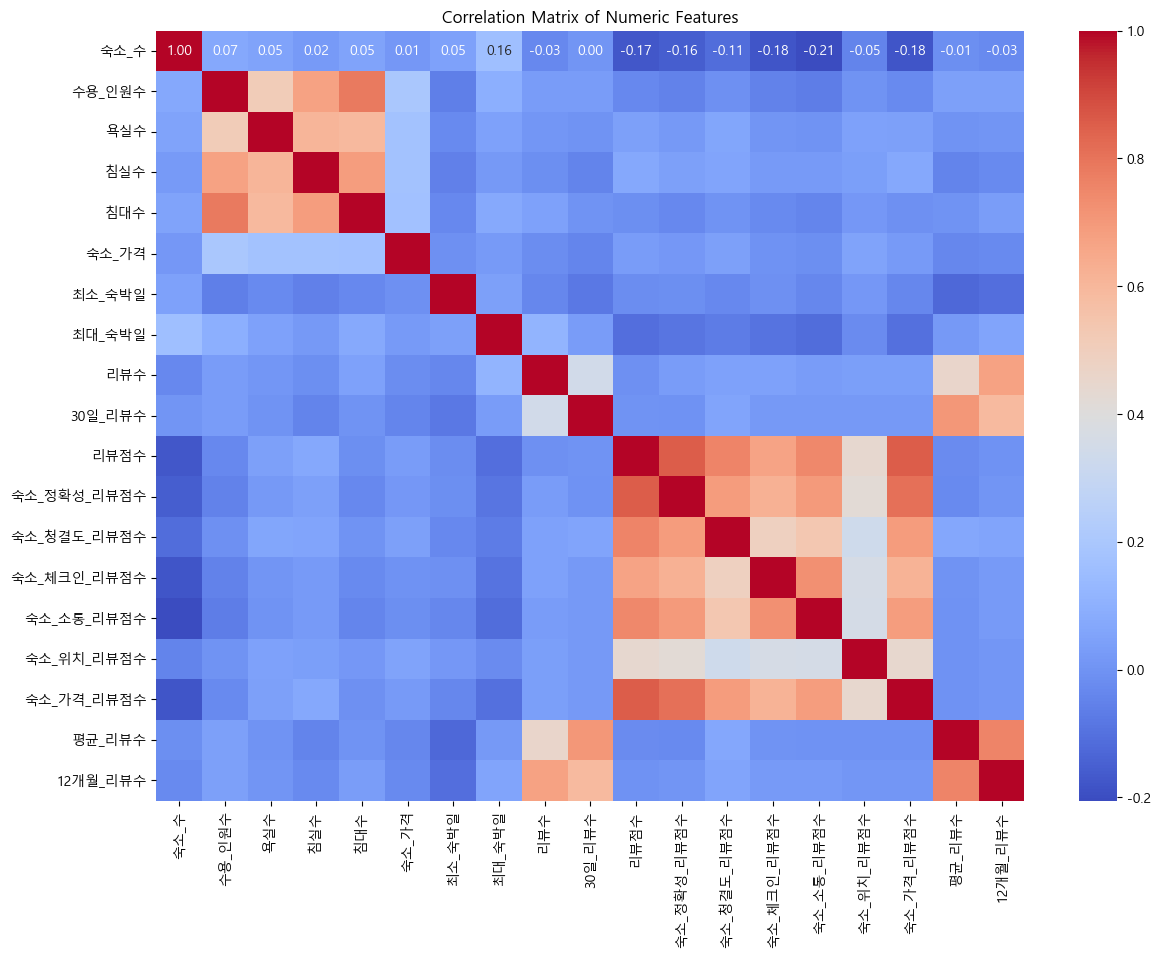

In [55]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

## 카이제곱 분석을 통해 범주형 데이터 관계 검증

In [56]:
df_object = df.select_dtypes(include='object')
df_object

,슈퍼호스트,숙소_지역,숙소_유형,편의시설,url,숙소_특징,예약가능여부,마지막_리뷰
1,t,Temple,Entire home/apt,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",https://www.airbnb.com/rooms/165409,Entire rental unit,t,2023-10-21
2,f,Hôtel-de-Ville,Entire home/apt,"[""Cooking basics"", ""Long term stays allowed"", ...",https://www.airbnb.com/rooms/5396,Entire rental unit,t,2024-03-14
3,f,Entrepôt,Entire home/apt,"[""Shampoo"", ""Kitchen"", ""Washer"", ""Cooking basi...",https://www.airbnb.com/rooms/166370,Entire rental unit,t,2023-06-21
6,t,Hôtel-de-Ville,Entire home/apt,"[""Cooking basics"", ""Wifi"", ""Dedicated workspac...",https://www.airbnb.com/rooms/7397,Entire rental unit,t,2024-02-23
8,t,Hôtel-de-Ville,Entire home/apt,"[""Shampoo"", ""Freezer"", ""Kitchen"", ""Extra pillo...",https://www.airbnb.com/rooms/41106,Entire rental unit,t,2024-01-02
...,...,...,...,...,...,...,...,...
82649,f,Buttes-Montmartre,Private room,"[""Extra pillows and blankets"", ""Wifi"", ""Dining...",https://www.airbnb.com/rooms/1103696635979533455,Private room in rental unit,t,2024-03-13
82975,f,Buttes-Montmartre,Entire home/apt,"[""Cleaning products"", ""Essentials"", ""Body soap...",https://www.airbnb.com/rooms/1104437899838519130,Entire rental unit,t,2024-03-17
83073,f,Buttes-Montmartre,Entire home/apt,"[""Cooking basics"", ""Wifi"", ""Hangers"", ""Bed lin...",https://www.airbnb.com/rooms/1105169305670543918,Entire rental unit,t,2024-03-15
83158,f,Observatoire,Entire home/apt,"[""Cooking basics"", ""Pets allowed"", ""Hangers"", ...",https://www.airbnb.com/rooms/1105941359456285384,Entire rental unit,t,2024-03-10


url 과 마지막 리뷰는 필요해 보이지 않음.
 - 제거

In [57]:
df_object.drop(columns=['url','마지막_리뷰'],axis=1, inplace=True)
df_object.head()

,슈퍼호스트,숙소_지역,숙소_유형,편의시설,숙소_특징,예약가능여부
1,t,Temple,Entire home/apt,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",Entire rental unit,t
2,f,Hôtel-de-Ville,Entire home/apt,"[""Cooking basics"", ""Long term stays allowed"", ...",Entire rental unit,t
3,f,Entrepôt,Entire home/apt,"[""Shampoo"", ""Kitchen"", ""Washer"", ""Cooking basi...",Entire rental unit,t
6,t,Hôtel-de-Ville,Entire home/apt,"[""Cooking basics"", ""Wifi"", ""Dedicated workspac...",Entire rental unit,t
8,t,Hôtel-de-Ville,Entire home/apt,"[""Shampoo"", ""Freezer"", ""Kitchen"", ""Extra pillo...",Entire rental unit,t


In [58]:
df_object.reset_index(inplace=True)

In [59]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   30990 non-null  int64 
 1   슈퍼호스트   30990 non-null  object
 2   숙소_지역   30990 non-null  object
 3   숙소_유형   30990 non-null  object
 4   편의시설    30990 non-null  object
 5   숙소_특징   30990 non-null  object
 6   예약가능여부  30990 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


범주형 데이터에서는 슈퍼호스트가 중요하므로 슈퍼호스트를 기준으로 다른 변수들과의 독립성 확인

Chi2 Statistic: 두 변수 사이의 연관성의 강도 <br>

p-value: 귀무가설(두 변수가 독립적이다 = 두 변수 사이에 연관이 없다)을 기각할 확률. 일반적으로 p-value가 0.05 미만이면, 귀무가설을 기각하고 두 변수 사이에 통계적으로 유의미한 관계가 있음을 결론지을 수 있음<br>

Degrees of Freedom: 분석에 사용된 범주의 수에 따라 달라지는 자유도<br>

Expected Frequencies: 변수들이 독립일 경우 기대되는 빈도수<br>

In [60]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(df_object['슈퍼호스트'], df_object['숙소_지역'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)


Chi2 Statistic: 50.80199096646989
p-value: 9.977841207180535e-05
Degrees of Freedom: 19
Expected Frequencies: [[1222.01897386  961.12333011 1063.18354308 2205.44685382 1546.44878993
   653.59090029  821.88886738  587.35314618  615.74075508 1055.07279768
   729.96708616 1049.66563408  612.36127783  717.1250726  1105.08906099
  1901.96979671  783.36282672 1129.42129719 1509.95043562  675.2195547 ]
 [ 585.98102614  460.87666989  509.81645692 1057.55314618  741.55121007
   313.40909971  394.11113262  281.64685382  295.25924492  505.92720232
   350.03291384  503.33436592  293.63872217  343.8749274   529.91093901
   912.03020329  375.63717328  541.57870281  724.04956438  323.7804453 ]]


슈퍼호스트 - 숙소_지역
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 19
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 강한 연관성을 보임

In [61]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['슈퍼호스트'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '숙소_유형')


Chi2 Statistic: 111.32695996719305
p-value: 5.017421271931346e-26
Degrees of Freedom: 1
Expected Frequencies: [[19087.2875121  1858.7124879]
 [ 9152.7124879   891.2875121]]


슈퍼호스트 - 숙소_유형
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 1 => 두 변수 사이의 관계를 평가하기 위해서 한 가지 조검만 고려되었음을 의미함
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 강한 연관성을 보임

In [62]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['슈퍼호스트'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '편의시설')


Chi2 Statistic: 30640.137245352395
p-value: 0.006802088801402569
Degrees of Freedom: 30032
Expected Frequencies: [[  0.67589545   0.67589545   0.67589545 ...   0.67589545   0.67589545
  110.17095837]
 [  0.32410455   0.32410455   0.32410455 ...   0.32410455   0.32410455
   52.82904163]]


슈퍼호스트 - 편의시설
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 30032 => 분석에 사용된 범주(편의시설의 종류)가 매우 많음을 의미함. => 즉, 편의시설 데이터가 범주가 너무 많음
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 대부분 낮은 기대 빈도를 보이나 마지막 값이 상대적으로 높은 수치임

In [63]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['슈퍼호스트'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '숙소_특징')


Chi2 Statistic: 430.22698422497217
p-value: 1.8199130694150774e-68
Degrees of Freedom: 37
Expected Frequencies: [[2.70358180e+00 6.75895450e-01 6.75895450e-01 6.75895450e-01
  8.73256922e+02 7.43484995e+00 8.11074540e+00 1.13550436e+02
  1.35179090e+00 3.62279961e+02 1.21661181e+01 1.74394544e+04
  1.33151404e+02 8.38110358e+01 2.02768635e+01 2.70358180e+00
  6.75895450e-01 1.35179090e+00 1.28420136e+01 1.62890803e+02
  2.02768635e+00 1.82491772e+01 1.14902227e+02 6.75895450e-01
  1.35179090e+01 8.11074540e+00 1.89250726e+01 1.55455954e+01
  2.23045499e+01 1.13077309e+03 5.40716360e+00 6.75895450e-01
  2.43322362e+01 6.75895450e-01 2.09527590e+01 1.32475508e+02
  1.70325653e+02 6.08305905e+00]
 [1.29641820e+00 3.24104550e-01 3.24104550e-01 3.24104550e-01
  4.18743078e+02 3.56515005e+00 3.88925460e+00 5.44495644e+01
  6.48209100e-01 1.73720039e+02 5.83388190e+00 8.36254560e+03
  6.38485963e+01 4.01889642e+01 9.72313650e+00 1.29641820e+00
  3.24104550e-01 6.48209100e-01 6.15798645e+00 7.

슈퍼호스트 - 숙소_특징
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 37
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 대부분 낮은 기대 빈도를 보이나 특정 값이 상대적으로 높은 빈도를 보임

In [64]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['슈퍼호스트'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '예약가능여부')


Chi2 Statistic: 3.4308995341124975
p-value: 0.06398724031233044
Degrees of Freedom: 1
Expected Frequencies: [[6.7589545e+00 2.0939241e+04]
 [3.2410455e+00 1.0040759e+04]]


슈퍼호스트 - 예약가능여부
 - 약한 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 채택 => 두 변수 사이에 연관성이 없음
 - 자유도 : 1
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있을 것 같지만, 그 차이가 통계적으로 유의미하지 않음

숙소_지역과의 독립성 확인

In [65]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   30990 non-null  int64 
 1   슈퍼호스트   30990 non-null  object
 2   숙소_지역   30990 non-null  object
 3   숙소_유형   30990 non-null  object
 4   편의시설    30990 non-null  object
 5   숙소_특징   30990 non-null  object
 6   예약가능여부  30990 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [67]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_지역'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '숙소_유형')


Chi2 Statistic: 251.43264119347188
p-value: 1.5865419742569714e-42
Degrees of Freedom: 19
Expected Frequencies: [[1647.56114876  160.43885124]
 [1295.81413359  126.18586641]
 [1433.41464989  139.58535011]
 [2973.44691836  289.55308164]
 [2084.96676347  203.03323653]
 [ 881.19006131   85.80993869]
 [1108.09422394  107.90577606]
 [ 791.88641497   77.11358503]
 [ 830.15940626   80.84059374]
 [1422.47950952  138.52049048]
 [ 984.16263311   95.83736689]
 [1415.18941594  137.81058406]
 [ 825.60309777   80.39690223]
 [ 966.84866086   94.15133914]
 [1489.91287512  145.08712488]
 [2564.29041626  249.70958374]
 [1056.1523072   102.8476928 ]
 [1522.71829622  148.28170378]
 [2035.75863182  198.24136818]
 [ 910.35043562   88.64956438]]


숙소_지역 - 숙소_유형
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 19
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 강력한 관계가 있음

In [68]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_지역'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '편의시설')


Chi2 Statistic: 577384.0285730335
p-value: 1.3193892874453673e-10
Degrees of Freedom: 570608
Expected Frequencies: [[ 0.0583414   0.0583414   0.0583414  ...  0.0583414   0.0583414
   9.50964827]
 [ 0.04588577  0.04588577  0.04588577 ...  0.04588577  0.04588577
   7.47938045]
 [ 0.05075831  0.05075831  0.05075831 ...  0.05075831  0.05075831
   8.27360439]
 ...
 [ 0.05392062  0.05392062  0.05392062 ...  0.05392062  0.05392062
   8.78906099]
 [ 0.07208777  0.07208777  0.07208777 ...  0.07208777  0.07208777
  11.75030655]
 [ 0.03223621  0.03223621  0.03223621 ...  0.03223621  0.03223621
   5.25450145]]


숙소_지역 - 편의시설
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 570608
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

In [69]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_지역'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '숙소_특징')


Chi2 Statistic: 2594.680632963707
p-value: 2.949790956977114e-214
Degrees of Freedom: 703
Expected Frequencies: [[2.33365602e-01 5.83414005e-02 5.83414005e-02 5.83414005e-02
  7.53770894e+01 6.41755405e-01 7.00096805e-01 9.80135528e+00
  1.16682801e-01 3.12709906e+01 1.05014521e+00 1.50532481e+03
  1.14932559e+01 7.23433366e+00 1.75024201e+00 2.33365602e-01
  5.83414005e-02 1.16682801e-01 1.10848661e+00 1.40602775e+01
  1.75024201e-01 1.57521781e+00 9.91803808e+00 5.83414005e-02
  1.16682801e+00 7.00096805e-01 1.63355921e+00 1.34185221e+00
  1.92526621e+00 9.76051630e+01 4.66731204e-01 5.83414005e-02
  2.10029042e+00 5.83414005e-02 1.80858341e+00 1.14349145e+01
  1.47020329e+01 5.25072604e-01]
 [1.83543078e-01 4.58857696e-02 4.58857696e-02 4.58857696e-02
  5.92844143e+01 5.04743466e-01 5.50629235e-01 7.70880929e+00
  9.17715392e-02 2.45947725e+01 8.25943853e-01 1.18394463e+03
  9.03949661e+00 5.68983543e+00 1.37657309e+00 1.83543078e-01
  4.58857696e-02 9.17715392e-02 8.71829622e-01 1.

숙소_지역 - 숙소_특징
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 703
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

In [70]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_지역'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '예약가능여부')


Chi2 Statistic: 50.497458857748725
p-value: 0.00011068959864293066
Degrees of Freedom: 19
Expected Frequencies: [[5.83414005e-01 1.80741659e+03]
 [4.58857696e-01 1.42154114e+03]
 [5.07583091e-01 1.57249242e+03]
 [1.05292030e+00 3.26194708e+03]
 [7.38302678e-01 2.28726170e+03]
 [3.12036141e-01 9.66687964e+02]
 [3.92384640e-01 1.21560762e+03]
 [2.80413036e-01 8.68719587e+02]
 [2.93965795e-01 9.10706034e+02]
 [5.03710874e-01 1.56049629e+03]
 [3.48499516e-01 1.07965150e+03]
 [5.01129397e-01 1.55249887e+03]
 [2.92352372e-01 9.05707648e+02]
 [3.42368506e-01 1.06065763e+03]
 [5.27589545e-01 1.63447241e+03]
 [9.08034850e-01 2.81309197e+03]
 [3.73991610e-01 1.15862601e+03]
 [5.39206196e-01 1.67046079e+03]
 [7.20877702e-01 2.23327912e+03]
 [3.22362052e-01 9.98677638e+02]]


숙소_지역 - 예약가능여부
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 19
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

숙소_유형과의 독립성 확인

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   30990 non-null  int64 
 1   슈퍼호스트   30990 non-null  object
 2   숙소_지역   30990 non-null  object
 3   숙소_유형   30990 non-null  object
 4   편의시설    30990 non-null  object
 5   숙소_특징   30990 non-null  object
 6   예약가능여부  30990 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [71]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_유형'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '편의시설')


Chi2 Statistic: 30601.40634064538
p-value: 0.010401371318736908
Degrees of Freedom: 30032
Expected Frequencies: [[9.11261697e-01 9.11261697e-01 9.11261697e-01 ... 9.11261697e-01
  9.11261697e-01 1.48535657e+02]
 [8.87383027e-02 8.87383027e-02 8.87383027e-02 ... 8.87383027e-02
  8.87383027e-02 1.44643433e+01]]


숙소_유형 - 편의시설
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 30032
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

In [72]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_유형'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '숙소_특징')


Chi2 Statistic: 30930.162239455687
p-value: 0.0
Degrees of Freedom: 37
Expected Frequencies: [[3.64504679e+00 9.11261697e-01 9.11261697e-01 9.11261697e-01
  1.17735011e+03 1.00238787e+01 1.09351404e+01 1.53091965e+02
  1.82252339e+00 4.88436270e+02 1.64027106e+01 2.35123743e+04
  1.79518554e+02 1.12996450e+02 2.73378509e+01 3.64504679e+00
  9.11261697e-01 1.82252339e+00 1.73139722e+01 2.19614069e+02
  2.73378509e+00 2.46040658e+01 1.54914489e+02 9.11261697e-01
  1.82252339e+01 1.09351404e+01 2.55153275e+01 2.09590190e+01
  3.00716360e+01 1.52454082e+03 7.29009358e+00 9.11261697e-01
  3.28054211e+01 9.11261697e-01 2.82491126e+01 1.78607293e+02
  2.29637948e+02 8.20135528e+00]
 [3.54953211e-01 8.87383027e-02 8.87383027e-02 8.87383027e-02
  1.14649887e+02 9.76121329e-01 1.06485963e+00 1.49080348e+01
  1.77476605e-01 4.75637302e+01 1.59728945e+00 2.28962569e+03
  1.74814456e+01 1.10035495e+01 2.66214908e+00 3.54953211e-01
  8.87383027e-02 1.77476605e-01 1.68602775e+00 2.13859309e+01
  2.66

숙소_유형 - 숙소_특징
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 37
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

In [73]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_유형'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '예약가능여부')


Chi2 Statistic: 54.09195326347429
p-value: 1.913231717475605e-13
Degrees of Freedom: 1
Expected Frequencies: [[9.11261697e+00 2.82308874e+04]
 [8.87383027e-01 2.74911262e+03]]


숙소_유형 - 예약가능여부
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 1
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

편의시설 과의 독립성 확인

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   30990 non-null  int64 
 1   슈퍼호스트   30990 non-null  object
 2   숙소_지역   30990 non-null  object
 3   숙소_유형   30990 non-null  object
 4   편의시설    30990 non-null  object
 5   숙소_특징   30990 non-null  object
 6   예약가능여부  30990 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [74]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['편의시설'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '숙소_특징')


Chi2 Statistic: 1136813.0266717256
p-value: 1.4248713288573829e-65
Degrees of Freedom: 1111184
Expected Frequencies: [[1.29073895e-04 3.22684737e-05 3.22684737e-05 ... 6.32462085e-03
  8.13165537e-03 2.90416263e-04]
 [1.29073895e-04 3.22684737e-05 3.22684737e-05 ... 6.32462085e-03
  8.13165537e-03 2.90416263e-04]
 [1.29073895e-04 3.22684737e-05 3.22684737e-05 ... 6.32462085e-03
  8.13165537e-03 2.90416263e-04]
 ...
 [1.29073895e-04 3.22684737e-05 3.22684737e-05 ... 6.32462085e-03
  8.13165537e-03 2.90416263e-04]
 [1.29073895e-04 3.22684737e-05 3.22684737e-05 ... 6.32462085e-03
  8.13165537e-03 2.90416263e-04]
 [2.10390449e-02 5.25976121e-03 5.25976121e-03 ... 1.03091320e+00
  1.32545983e+00 4.73378509e-02]]


편의시설 - 숙소_특징
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 1111184
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

In [75]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['편의시설'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '예약가능여부')


Chi2 Statistic: 30989.999999999996
p-value: 5.4230474856633053e-05
Degrees of Freedom: 30032
Expected Frequencies: [[3.22684737e-04 9.99677315e-01]
 [3.22684737e-04 9.99677315e-01]
 [3.22684737e-04 9.99677315e-01]
 ...
 [3.22684737e-04 9.99677315e-01]
 [3.22684737e-04 9.99677315e-01]
 [5.25976121e-02 1.62947402e+02]]


편의시설 - 숙소_특징
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 30032
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

숙소_특징 과의 독립성 확인

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   30990 non-null  int64 
 1   슈퍼호스트   30990 non-null  object
 2   숙소_지역   30990 non-null  object
 3   숙소_유형   30990 non-null  object
 4   편의시설    30990 non-null  object
 5   숙소_특징   30990 non-null  object
 6   예약가능여부  30990 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [76]:
# 함수로 만들어서 이후 진행

def perform_chi_square_test(df, column_name):
    # 교차 테이블 생성
    cross_tab = pd.crosstab(df['숙소_특징'], df[column_name])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 결과 출력
    print("Chi2 Statistic:", chi2)
    print("p-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)

perform_chi_square_test(df_object, '예약가능여부')

Chi2 Statistic: 1002.7223584212701
p-value: 2.2591866492850932e-186
Degrees of Freedom: 37
Expected Frequencies: [[1.29073895e-03 3.99870926e+00]
 [3.22684737e-04 9.99677315e-01]
 [3.22684737e-04 9.99677315e-01]
 [3.22684737e-04 9.99677315e-01]
 [4.16908680e-01 1.29158309e+03]
 [3.54953211e-03 1.09964505e+01]
 [3.87221684e-03 1.19961278e+01]
 [5.42110358e-02 1.67945789e+02]
 [6.45369474e-04 1.99935463e+00]
 [1.72959019e-01 5.35827041e+02]
 [5.80832527e-03 1.79941917e+01]
 [8.32591158e+00 2.57936741e+04]
 [6.35688932e-02 1.96936431e+02]
 [4.00129074e-02 1.23959987e+02]
 [9.68054211e-03 2.99903195e+01]
 [1.29073895e-03 3.99870926e+00]
 [3.22684737e-04 9.99677315e-01]
 [6.45369474e-04 1.99935463e+00]
 [6.13101000e-03 1.89938690e+01]
 [7.77670216e-02 2.40922233e+02]
 [9.68054211e-04 2.99903195e+00]
 [8.71248790e-03 2.69912875e+01]
 [5.48564053e-02 1.69945144e+02]
 [3.22684737e-04 9.99677315e-01]
 [6.45369474e-03 1.99935463e+01]
 [3.87221684e-03 1.19961278e+01]
 [9.03517264e-03 2.79909648e+

숙소_특징 - 예약가능여부
 - 연관성이 있음
 - 귀무가설(두 변수 사이에 연관이 없다) 기각 => 두 변수 사이에 연관성이 있음
 - 자유도 : 37
 - 기대 빈도수(차이가 크면 두 변수 사이의 연관성이 강함) : 관계가 있음

최종 결과 :
 - 슈퍼호스트-예약가능여부 제외 전부 두 변수 사이에 연관성이 있다고 나타남.
 - 다만 자유도가 높은 부분(대체로 편의시설과의 결과)들은 추가 분석이 필요함.